In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from astropy.table import Table, Column
from scipy.optimize import curve_fit
from IPython.display import display, Math, Latex
import scipy.special
from scipy.stats import norm


(array([    2.,     6.,    20.,    63.,   134.,   278.,   545.,   852.,
         1200.,  1428.,  1519.,  1341.,  1045.,   731.,   445.,   238.,
           90.,    41.,    17.,     5.]),
 array([-390.93904221, -353.03630689, -315.13357157, -277.23083625,
        -239.32810093, -201.42536561, -163.52263029, -125.61989497,
         -87.71715965,  -49.81442433,  -11.91168901,   25.99104631,
          63.89378163,  101.79651695,  139.69925227,  177.60198759,
         215.50472291,  253.40745823,  291.31019355,  329.21292887,
         367.11566419]),
 <a list of 20 Patch objects>)

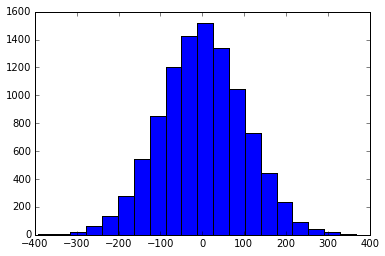

In [2]:
NoiseCenter = 0
NoiseWidth = 100

noise = np.random.normal(loc=NoiseCenter,scale=NoiseWidth,size=10000)

hist(noise,20)

0.433192798731


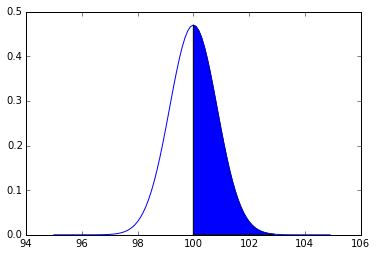

In [3]:
step = 0.1
xdata = arange(95,105,step)

Center = 100.0
Cutoff1 = 100.0   # Must be less than Cutoff2 to work!
Cutoff2 = 103.0  # Must be greater than Cutoff1 to work!
Spread = 2.0
percent = norm.cdf(Cutoff2,Center,Spread)-norm.cdf(Cutoff1,Center,Spread)
Sigma = Spread/(2*sqrt(2*math.log(2)))
fillfactorx = arange(Cutoff1,Cutoff2,step)
fillfactory = (1/(sqrt(2*math.pi)*Sigma))*np.exp(-(fillfactorx-Center)**2/(2*Sigma**2))

NormalDistribution = (1/(sqrt(2*math.pi)*Sigma))*np.exp(-(xdata-Center)**2/(2*Sigma**2))

plot(xdata,NormalDistribution)
fill_between(fillfactorx, 0, fillfactory)

print percent
